Thompson örneklemesi çok büyük veri gruplarından bir örneklem aralarak bu örneklem üzerinden tüm veriye uyarlanabilir istatistiksel çıkarımlarda bulunmaktır. Her olayın arkasından bir dağılım olduğunu kabul eder ve örneklem üzerinden bu dağılımı elde etmeye çalışır. Ucb algoritmasına çok benzerdir. Hesaplama işlemlerinde ucb yerine beta dağılımını dikkate alır. Beta dağılımının hesaplanması aşağıdaki formüller ile gösterilmiştir.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [32]:
data = pd.read_csv("Ads_CTR.csv")
data2 = pd.read_csv("slot_machine.csv")
data2.drop("Unnamed: 0",axis=1,inplace=True)

In [133]:
def thompson(data):
    Ni_1 = {} # makinenin ödül vermesi yani 1
    Ni_0 = {} # ödül vermemesi yani 0
    Ni_1.update(zip(list(data.columns.values),[0]*len(data.columns)))
    Ni_0.update(zip(list(data.columns.values),[0]*len(data.columns)))
    l = []
    total_reward = 0
    for i in range(0,len(data)):
        for xx in data.columns:
            start = th_calculater(Ni_1,Ni_0,data)
            if data[xx][i] == 1:
                Ni_1[xx] = Ni_1[xx]+1
            else:
                Ni_0[xx] = Ni_0[xx]+1
        total_reward = total_reward+data[start][i]
        l.append(start) 
    print("toplam ödül: ",total_reward)
    return l
def th_calculater(Ni_1,Ni_0,data):
    l = {}
    for i in Ni_1.keys():
        alpha,beta = Ni_1[i],Ni_0[i]
        random_beta = random.betavariate(alpha+1,beta+1)
        l[i] = random_beta
    return sorted(l.items(),key= lambda x: x[1])[-1][0]

In [147]:
l = thompson(data)

toplam ödül:  2695


(array([9.000e+00, 8.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        9.000e+00, 0.000e+00, 9.852e+03, 1.190e+02]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

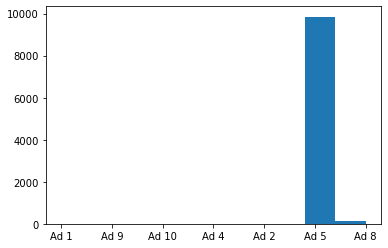

In [148]:
plt.hist(l)

In [145]:
l2 = thompson(data2)

toplam ödül:  556


(array([133.,   0.,   4.,   0., 575.,   0., 104.,   0.,  83., 101.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

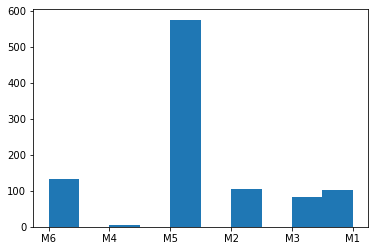

In [146]:
plt.hist(l2)